# Data Exploration

Explore the various aspects of the data, visualizing and analyzing it in different ways. It is really important that you are familiar with it. You should describe how you made various design choices, based on the dataset exploration.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

The RGB images come flattened. We need to reshape them so we have 3-channels of 32x32 images.

In [2]:
def train_batch(batch_no):
    cifar10_dir = "./cifar-10-batches-py/"
    batch_file = cifar10_dir+"data_batch_"+str(batch_no)
    with open(batch_file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    x, y = batch[b'data'], batch[b'labels']
    x = x.reshape((np.shape(x)[0], 3, 32, 32)).transpose(0, 2, 3, 1)  # reshape the images
    return x, y

def test_batch():
    batch_file = "./cifar-10-batches-py/test_batch"
    with open(batch_file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    x, y = batch[b'data'], batch[b'labels']
    x = x.reshape((np.shape(x)[0], 3, 32, 32)).transpose(0, 2, 3, 1)  # reshape the images
    return x, np.array(y)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# load the data
x, y = [], []
for i in range(1, 6):
    x.append(train_batch(i)[0])
    y.append(train_batch(i)[1])
    
x, y = np.vstack((x)), np.hstack((y))

# testing set 
x_test, y_test = test_batch()

# save 20% of the training data for validation
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                  test_size=0.2,
                                                  random_state=123,
                                                  shuffle=True)

Distribution of the features

In [5]:
x_list = [x_train, x_test, x_val]
y_list = [y_train, y_test, y_val]
lab_list = ['Training', 'Testing', 'Validation']

for x, label in zip(x_list, lab_list):
    print("{} features".format(label))
    print("Min : {}".format(np.min(x)))
    print("Max : {}".format(np.max(x)))
    print("Mean : {}".format(np.mean(x)))
    print("Std : {}".format(np.std(x)))
    print(" ")

Training features
Min : 0
Max : 255
Mean : 120.58640152180989
Std : 64.08666812813689
 
Testing features
Min : 0
Max : 255
Mean : 121.52915475260417
Std : 64.06097012299574
 
Validation features
Min : 0
Max : 255
Mean : 121.19221953125
Std : 64.40080313746678
 


The datasets seem to be pretty consistent. The min and max intensity values are 0 and 225 for training/testing/validation datasets. Their mean and standard deviation are also pretty close.

distribution of the classes

In [6]:
def class_names():
    return ['airplane', 'automobile', 'bird', 'cat', 
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

classes = class_names()
for y, label in zip(y_list, lab_list):
    print("{} classes".format(label))
    for i, c in enumerate(classes):
        print("counts of {} class : {}".format(c, len(y[y==i])))
    print(" ")

Training classes
counts of airplane class : 3964
counts of automobile class : 4029
counts of bird class : 4021
counts of cat class : 3983
counts of deer class : 3954
counts of dog class : 4007
counts of frog class : 4030
counts of horse class : 4050
counts of ship class : 3978
counts of truck class : 3984
 
Testing classes
counts of airplane class : 1000
counts of automobile class : 1000
counts of bird class : 1000
counts of cat class : 1000
counts of deer class : 1000
counts of dog class : 1000
counts of frog class : 1000
counts of horse class : 1000
counts of ship class : 1000
counts of truck class : 1000
 
Validation classes
counts of airplane class : 1036
counts of automobile class : 971
counts of bird class : 979
counts of cat class : 1017
counts of deer class : 1046
counts of dog class : 993
counts of frog class : 970
counts of horse class : 950
counts of ship class : 1022
counts of truck class : 1016
 


The classes are also somewhat uniform among all datasets. There's no need to reweight the classes. 

visualizing the dataset

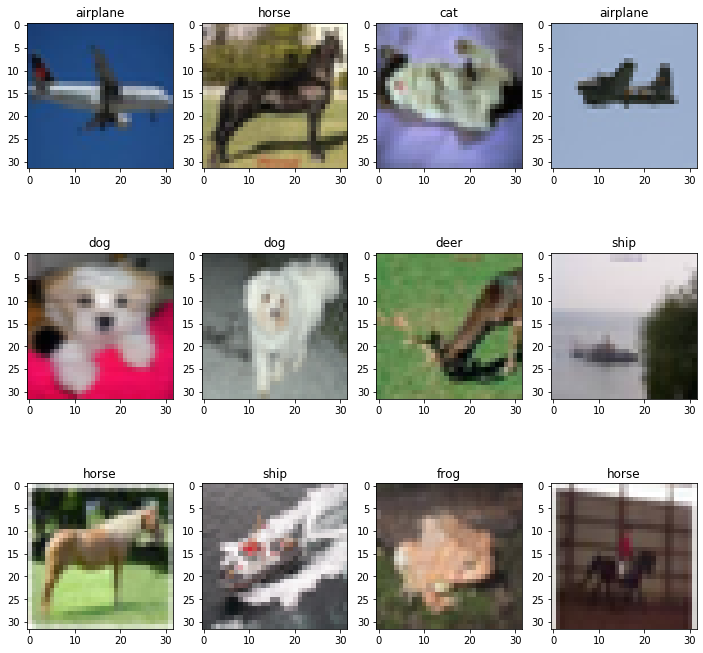

In [13]:
fig, axs = plt.subplots(3, 4, figsize=(12, 12))

count = 0
for i in range(3):
    for j in range(4):
        axs[i][j].imshow(x_train[count])
        axs[i][j].set_title(str(classes[y_train[count]]))
        count += 1

From the images above, we can see that the objects in the images have different sizes and are not always located at the center. This, and the fact that the dataset is relatively small, motivates the use of data augmentation.